In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
'''
# Disclaimer: This program retrieves data from an external site.
# The developer does not control the content or availability of the external site.
# Use this program at your own risk. The accuracy or completeness of the data cannot be guaranteed.
# Past price data is not indicative of future prices and should not be used for financial decisions.
'''
coin = "BTCUSDT"  # change here for other coin ticker symbol BTCUSDT LTCUSDT ADAUSDT ETHUSDT
number = 15000    
series = pd.DataFrame(data=None)
try:
    series[["date","price"]] = pd.read_csv("https://www.cryptodatadownload.com/cdd/Binance_" + coin + "_d.csv",skiprows = 1)[["Date","Close"]][:number]
    series["date"] = pd.to_datetime(series["date"]) 
    series = series[::-1]
    print(series.tail())  # check downloaded data
    print("working with ",len(series), " entries") 
except Exception as e:
        print(str(e),"some issues with download. Exiting...")
        SystemExit

        date     price
4 2023-08-28  26120.00
3 2023-08-29  27716.34
2 2023-08-30  27299.99
1 2023-08-31  25940.78
0 2023-09-01  25805.05
working with  2207  entries


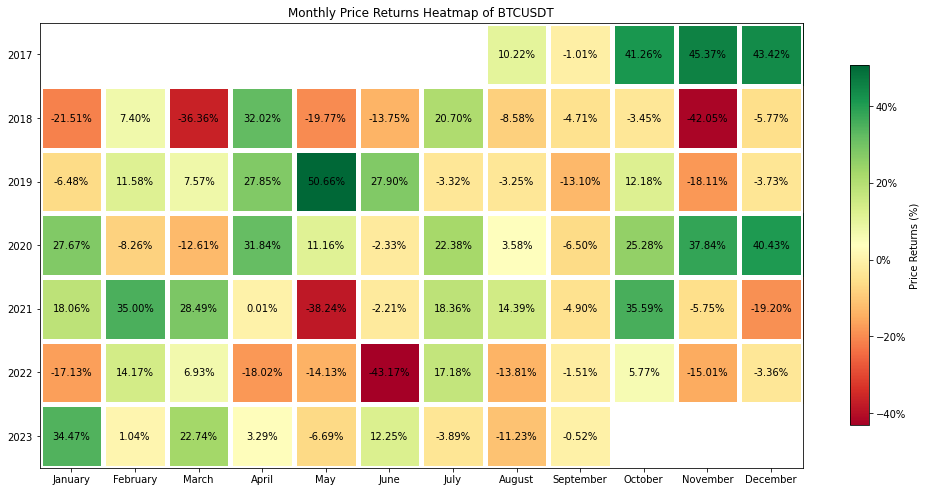

In [9]:
#series = series[series['date'].dt.year > 2017]  # cut out years here

# Calculate price returns
series['return'] = (series['price'] - series['price'].shift(1)) / series['price'].shift(1) * 100
series['return'] = series['return'].fillna(0)
price_returns = series.groupby([series['date'].dt.year, series['date'].dt.month])['return'].sum().unstack()

#Get months in order
unique_month_names = series['date'].dt.strftime('%B').unique()
month_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

unique_month_numbers = [month_to_number[month] for month in unique_month_names]
unique_month_numbers.sort()
sorted_month_names = [month for month, number in month_to_number.items() if number in unique_month_numbers]

# Create the heatmap
plt.figure(figsize=(14, 8))  # Adjust the size as needed
plt.imshow(price_returns, cmap= 'RdYlGn', aspect='equal')

# Add labels and ticks
plt.title("Monthly Price Returns Heatmap of " + coin)
plt.xticks(np.arange(12), sorted_month_names) 
plt.yticks(np.arange(len(price_returns.index)), price_returns.index, rotation = 0)
# Display the actual values inside each box
for i in range(len(price_returns.index)):
    for j in range(12):
        value = price_returns.values[i, j]
        if not np.isnan(value):
            plt.text(j, i, f"{value:.2f}%", ha='center', va='center', color='black')

for i in range(len(price_returns.index) + 1):
    plt.axhline(y=i - 0.5, color='white', linewidth=5)

for j in range(13):
    plt.axvline(x=j - 0.5, color='white', linewidth=5)

plt.colorbar(label="Price Returns (%)", shrink = 1.0 - 0.05 * len(price_returns.index), format=PercentFormatter())
plt.tight_layout()
plt.show()